# LGMVIP DATA SCIENCE INTERN TASK-4
# AUTHOR : ANUSHKA
## LEVEL - INTERMEDIATE
## PREDICTION USING DECISION TREE ALGORITHM

### IMPORTING THE NECESSARY LIBRARIES 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score

### LOADING THE DATASET 

In [5]:
data=pd.read_csv(r"C:\Users\Prachi\Downloads\iris.data" , header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data_header = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]
data.to_csv("iris.csv",header=data_header, index=False)

data1 = pd.read_csv("iris.csv")
data1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### DATASET INFO

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### FINDING NULL VALUES

In [8]:
data1.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            False         False          False         False    False
1            False         False          False         False    False
2            False         False          False         False    False
3            False         False          False         False    False
4            False         False          False         False    False
..             ...           ...            ...           ...      ...
145          False         False          False         False    False
146          False         False          False         False    False
147          False         False          False         False    False
148          False         False          False         False    False
149          False         False          False         False    False

[150 rows x 5 columns]>

In [9]:
data1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data1.shape

(150, 5)

In [11]:
data1['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:>

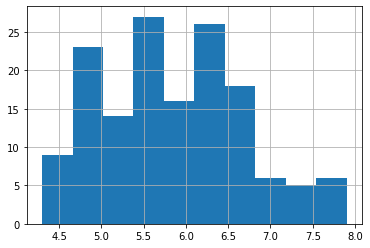

In [12]:
data1['SepalLengthCm'].hist()

<AxesSubplot:>

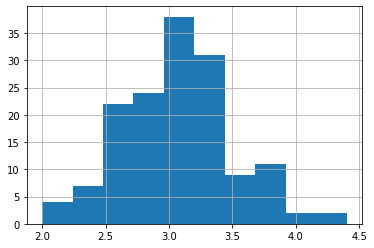

In [13]:
data1['SepalWidthCm'].hist()

<AxesSubplot:>

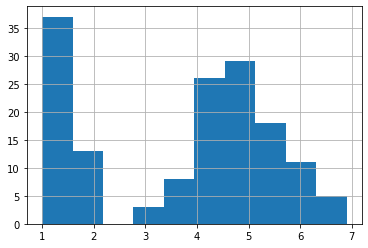

In [14]:
data1['PetalLengthCm'].hist()

<AxesSubplot:>

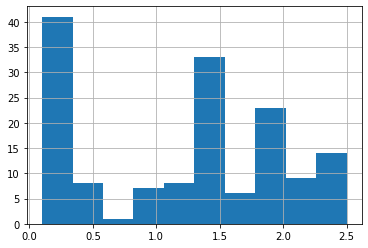

In [15]:
data1['PetalWidthCm'].hist()

### SCATTER PLOT

In [16]:
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

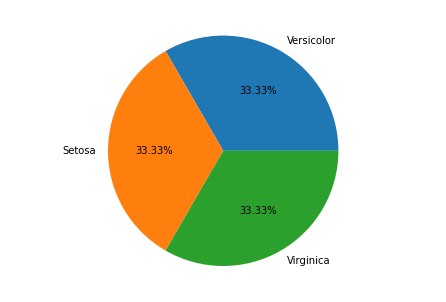

In [17]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
l=['Versicolor','Setosa','Virginica']
s=[50,50,50]
ax.pie(s,labels=l,autopct='%1.2f%%')
plt.show()

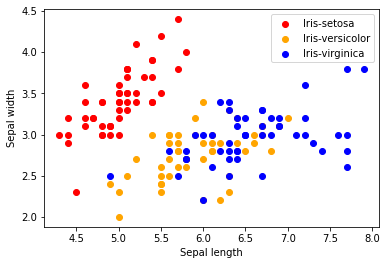

In [18]:
for i in range (3):
    x=data1[data1['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.legend()

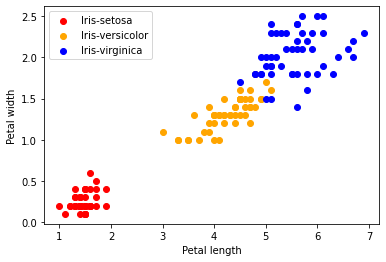

In [19]:
for i in range (3):
    x=data1[data1['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.legend()

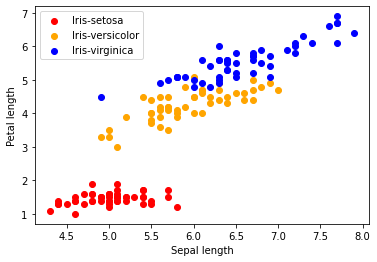

In [20]:
for i in range (3):
    x=data1[data1['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
    plt.xlabel("Sepal length")
    plt.ylabel("Petal length")
    plt.legend()

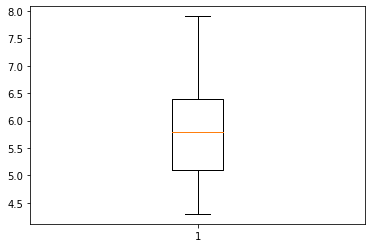

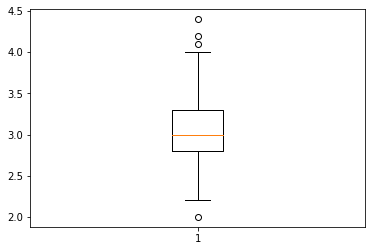

In [21]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([data1['SepalLengthCm']])
plt.figure(2)
plt.boxplot([data1['SepalWidthCm']])
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

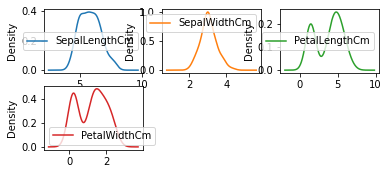

In [22]:
data1.plot(kind='density',subplots=True,layout=(3,3),sharex=False)

SepalLengthCm       AxesSubplot(0.125,0.536818;0.133621x0.343182)
SepalWidthCm     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
PetalLengthCm     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
PetalWidthCm     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
dtype: object

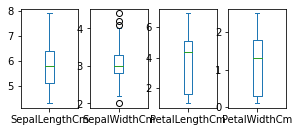

In [23]:
data1.plot(kind='box',subplots=True,layout=(2,5),sharex=False)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

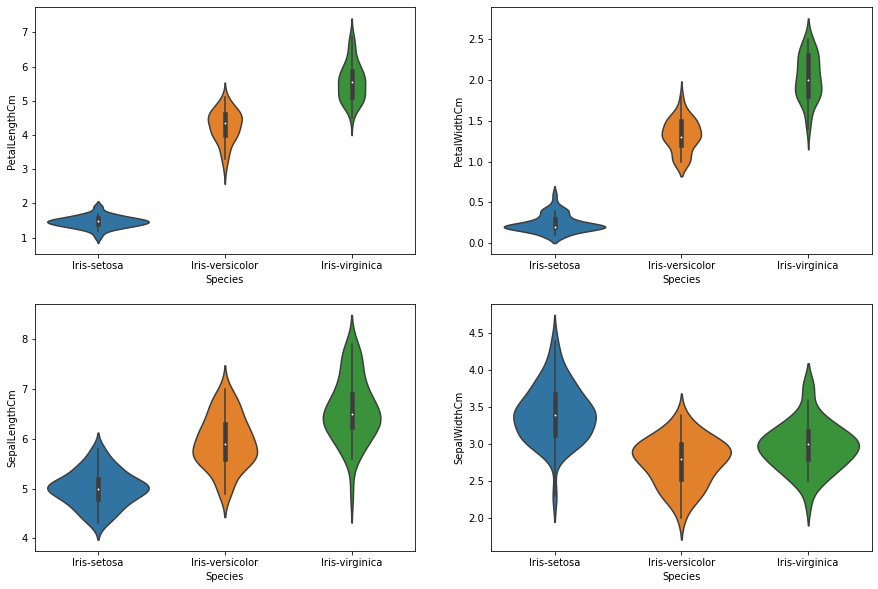

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data1)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data1)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data1)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data1)




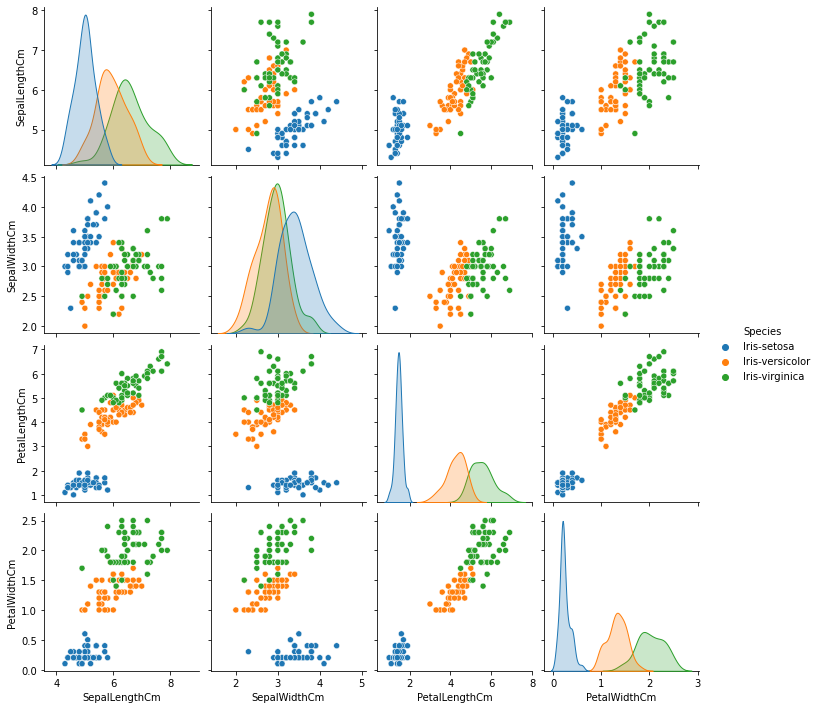

In [25]:
sns.pairplot(data1,hue='Species');

In [26]:
data1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

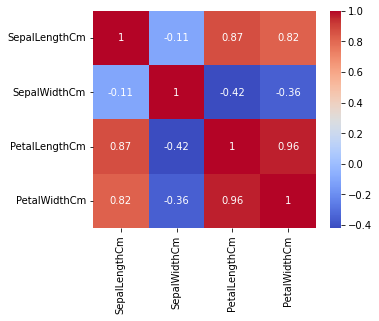

In [27]:
corr=data1.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
data1['Species']=le.fit_transform(data1['Species'])
data1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
from sklearn.model_selection import train_test_split
X= data1.drop(columns=['Species'])
Y=data1['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

### MODEL BUILDING DECISION TREE MODEL

In [31]:
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)

In [32]:
clf

DecisionTreeClassifier()

In [33]:
y_pred=clf.predict(x_test)

In [34]:
y_pred

array([0, 0, 2, 2, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0,
       0, 0, 2, 1, 2, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       2])

In [35]:
y_test

34     0
11     0
123    2
118    2
135    2
60     1
97     1
23     0
82     1
130    2
24     0
126    2
96     1
87     1
103    2
55     1
35     0
128    2
29     0
9      0
64     1
21     0
4      0
45     0
100    2
129    2
147    2
132    2
27     0
122    2
72     1
92     1
40     0
54     1
19     0
52     1
15     0
32     0
141    2
68     1
121    2
148    2
104    2
75     1
139    2
Name: Species, dtype: int32

In [36]:
data_frame=pd.DataFrame({"Actual Data":y_test,"Predicted Data":y_pred})

In [37]:
data_frame.head()

,Actual Data,Predicted Data
34,0,0
11,0,0
123,2,2
118,2,2
135,2,2


In [38]:
data_frame.tail()

,Actual Data,Predicted Data
121,2,2
148,2,2
104,2,2
75,1,1
139,2,2


### ACCURACY OF MODEL

In [39]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9333333333333333


### VISUALIZING THE DECISION TREE 

In [40]:
col_names=["Sepal Length","Sepal Width","Petal length","Petal width"]
target_names=["Setosa","Versicolor","Virginica"]

[Text(0.4, 0.9, 'Petal length <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [35, 37, 33]\nclass = Versicolor'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = Setosa'),
 Text(0.5, 0.7, 'Petal length <= 4.85\ngini = 0.498\nsamples = 70\nvalue = [0, 37, 33]\nclass = Versicolor'),
 Text(0.2, 0.5, 'Petal width <= 1.65\ngini = 0.102\nsamples = 37\nvalue = [0, 35, 2]\nclass = Versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Versicolor'),
 Text(0.3, 0.3, 'Sepal Width <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = Virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Versicolor'),
 Text(0.8, 0.5, 'Petal width <= 1.75\ngini = 0.114\nsamples = 33\nvalue = [0, 2, 31]\nclass = Virginica'),
 Text(0.7, 0.3, 'Petal width <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = Virginica'),
 Text(0.6, 0.1, 'gini = 

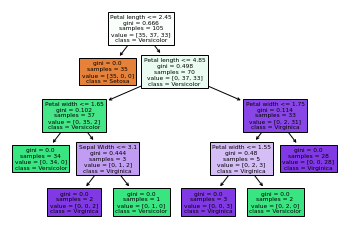

In [41]:
plot_tree(clf,feature_names=col_names,class_names=target_names,filled=True)

In [42]:
model=DecisionTreeClassifier().fit(X,Y)

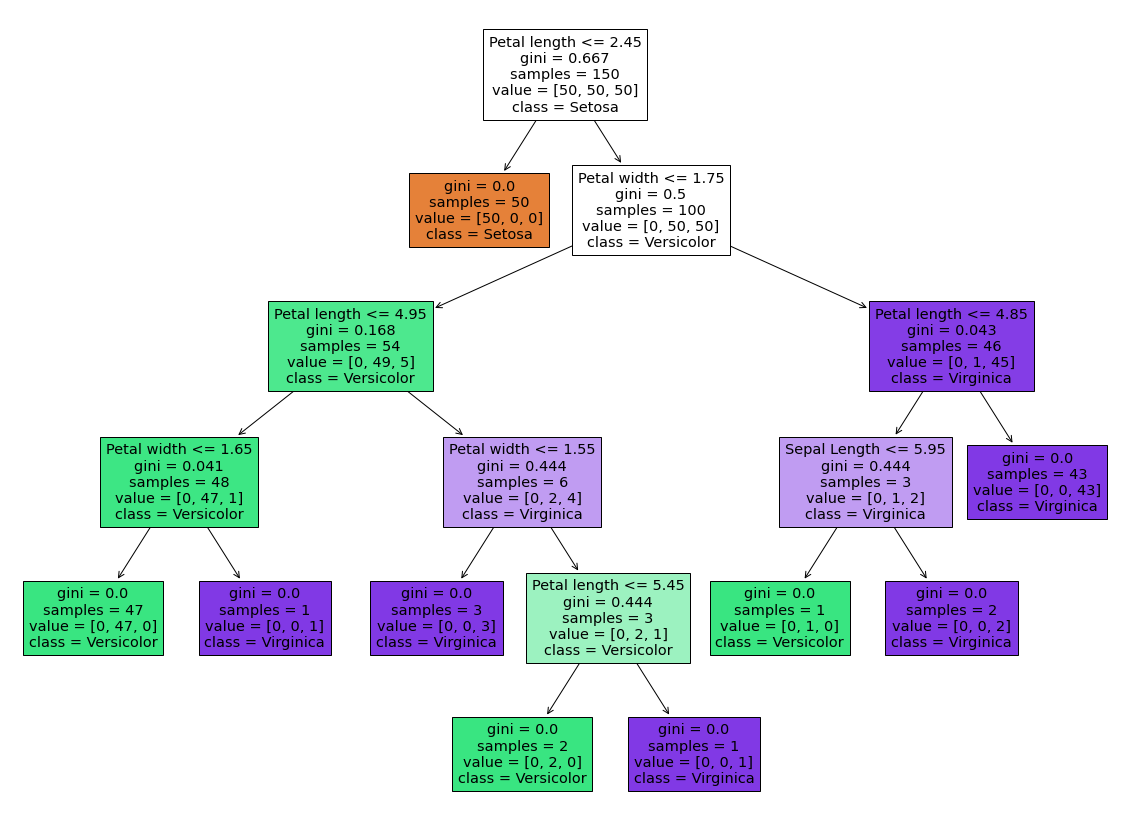

In [43]:
plt.figure(figsize=(20,15))
tree=tree.plot_tree(model,feature_names=col_names,class_names=target_names,filled=True)

## THANK YOU